In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd


In [5]:
file = 'graphene/standard_cell_pbc/kronig_penney_break_even/TG_hr_with_atom_coord.dat'
structure = np.loadtxt(file, usecols=(3,5,6,7,11,12,13))
df = pd.DataFrame(structure)
column_name = 0
df = df.drop_duplicates(subset=column_name)
x = df[1]
x_direct = df[4]
y = df[2]

## Kronig Penney 

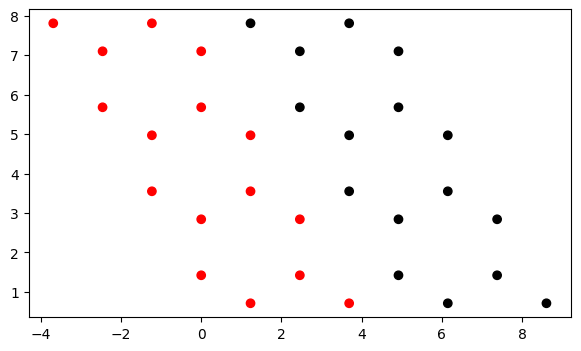

In [6]:
b = 0.5
U0 =  5

colors = []
potential = []
for i in range(len(x_direct)):
    if 0 <= x_direct.iloc[i] <= b:
        V = U0 / 2.0
        color = 'red'
    else:
        V = -U0 / 2.0
        color = 'black'
    potential.append(V)
    colors.append(color)
plt.figure(figsize=(7,4))
plt.scatter(x, y, c=colors)
plt.show()


## Kronig Penney break even symmetry

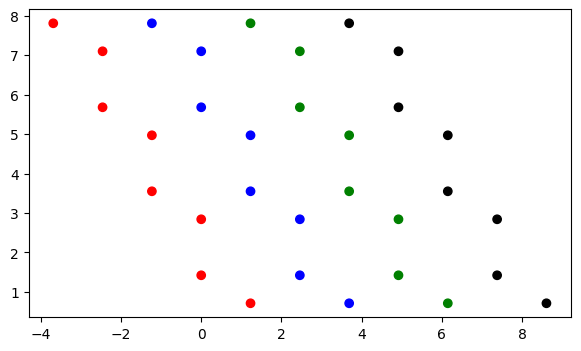

In [17]:
b = 0.5
U0 =  5
perturb = 0.1 * U0/2.0
start1 = 0.25
end1 = 0.5
start2 = 0.5
end2 = 0.75

colors = []
potential = []
for i in range(len(x_direct)):
    if 0 <= x_direct.iloc[i] <= b:
        V = U0 / 2.0
        color = 'red'
    else:
        V = -U0 / 2.0
        color = 'black'
    if (start1 <= x_direct.iloc[i] < end1):
        V += perturb
        color = 'blue'
    if (start2 <= x_direct.iloc[i] < end2):
        V -= perturb
        color = 'green'
    potential.append(V)
    colors.append(color)
plt.figure(figsize=(7,4))
plt.scatter(x, y, c=colors)
plt.show()


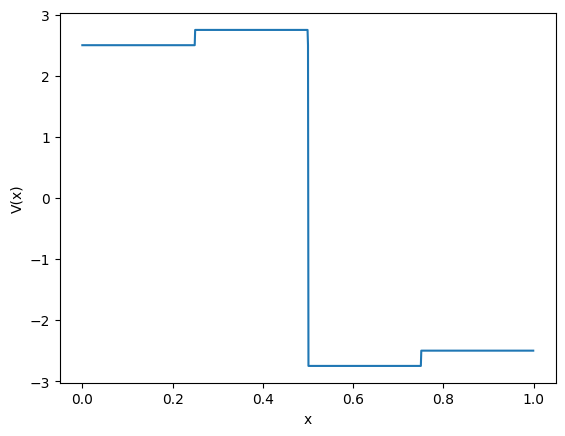

In [18]:
colors = []
x_direct = np.arange(0,1,0.001)
positions_and_potentials = []

for i in range(len(x_direct)):
    if 0 <= x_direct[i] <= b:
        V = U0 / 2.0
        color = 'red'
    else:
        V = -U0 / 2.0
        color = 'black'
    if (start1 <= x_direct[i] <= end1):
        V += perturb
        color = 'blue'
    if (start2 <= x_direct[i] <= end2):
        V -= perturb
        color = 'green'

    positions_and_potentials.append((x_direct[i], V))

sorted_positions_and_potentials = sorted(positions_and_potentials, key=lambda x: x[0])
sorted_positions, sorted_potentials = zip(*sorted_positions_and_potentials)

plt.plot(sorted_positions,sorted_potentials)
plt.xlabel('x')
plt.ylabel('V(x)')
plt.show()


## Kronig Penney break odd symmetry

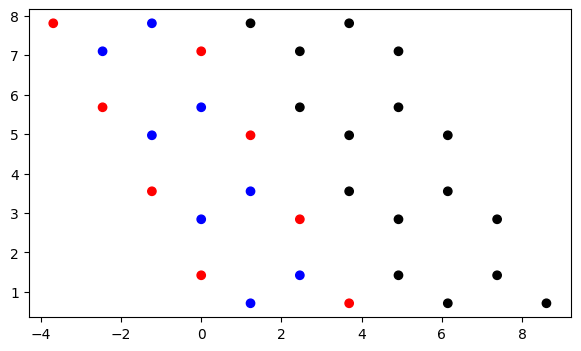

In [15]:
b = 0.5
U0 =  5
perturb = 0.1 * U0/2.0
start1 = 0.125
end1 = 0.375

colors = []
potential = []
for i in range(len(x_direct)):
    if 0 <= x_direct.iloc[i] < b:
        V = U0 / 2.0
        color = 'red'
    else:
        V = -U0 / 2.0
        color = 'black'
    if (start1 <= x_direct.iloc[i] < end1):
        V += perturb
        color = 'blue'
    potential.append(V)
    colors.append(color)
plt.figure(figsize=(7,4))
plt.scatter(x, y, c=colors)
plt.show()


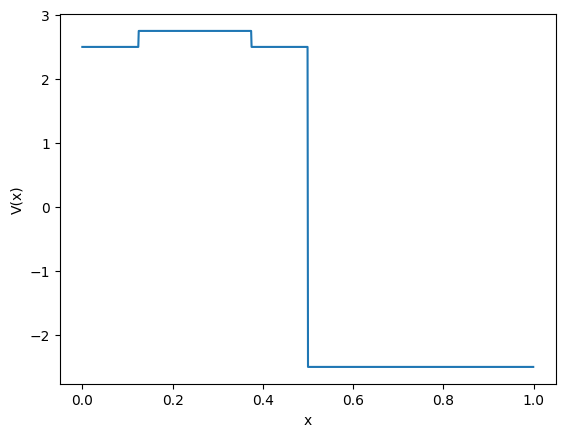

In [12]:
colors = []
x_direct = np.arange(0,1,0.001)
positions_and_potentials = []

for i in range(len(x_direct)):
    if 0 <= x_direct[i] < b:
        V = U0 / 2.0
        color = 'red'
    else:
        V = -U0 / 2.0
        color = 'black'
    if (start1 <= x_direct[i] < end1):
        V += perturb
        color = 'blue'

    positions_and_potentials.append((x_direct[i], V))

sorted_positions_and_potentials = sorted(positions_and_potentials, key=lambda x: x[0])
sorted_positions, sorted_potentials = zip(*sorted_positions_and_potentials)

plt.plot(sorted_positions,sorted_potentials)
plt.xlabel('x')
plt.ylabel('V(x)')
plt.show()


## Sinusoidal potential

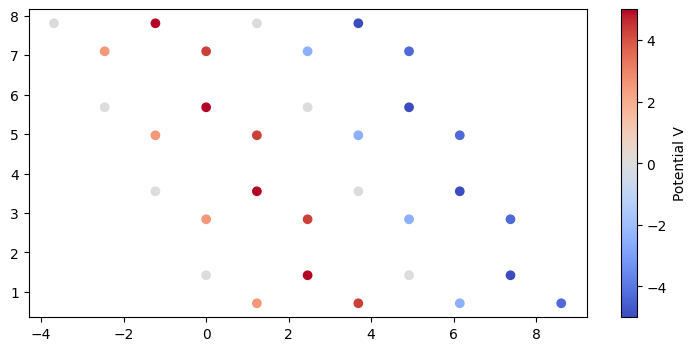

In [17]:
b = 0.5
U0 = 5
pos_atom1 = x_direct.iloc[0]
colors = []
potential = []
for i in range(len(x_direct)):
    V = U0 * np.sin(2 * np.pi * (x_direct.iloc[i]-pos_atom1))
    potential.append(V)

# Normalize the potential values to be between 0 and 1 for coloring
norm = plt.Normalize(min(potential), max(potential))
cmap = plt.get_cmap('coolwarm')  # Selecting the colormap

plt.figure(figsize=(9, 4))
plt.scatter(x, y, c=potential, cmap=cmap, norm=norm)
plt.colorbar(label='Potential V')  # Add a color bar to show the potential scale
plt.show()


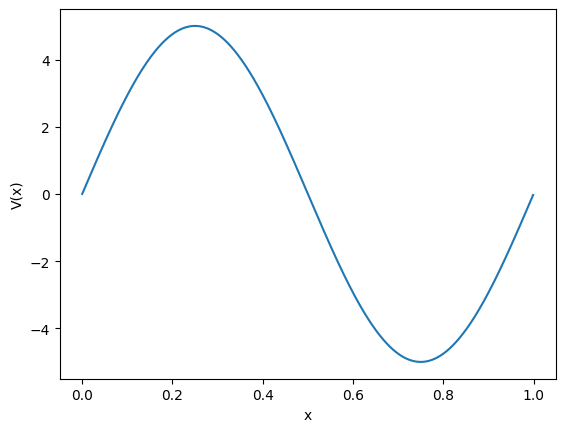

In [20]:
colors = []
x_direct = np.arange(0,1,0.001)
positions_and_potentials = []

for i in range(len(x_direct)):
    V = U0 * np.sin(2*np.pi*x_direct[i])
    if V >= 0:
        color = 'red'
    else:
        color = 'black'

    positions_and_potentials.append((x_direct[i], V))

sorted_positions_and_potentials = sorted(positions_and_potentials, key=lambda x: x[0])
sorted_positions, sorted_potentials = zip(*sorted_positions_and_potentials)

plt.plot(sorted_positions,sorted_potentials)
plt.xlabel('x')
plt.ylabel('V(x)')
plt.show()


## 2D triangular potentials

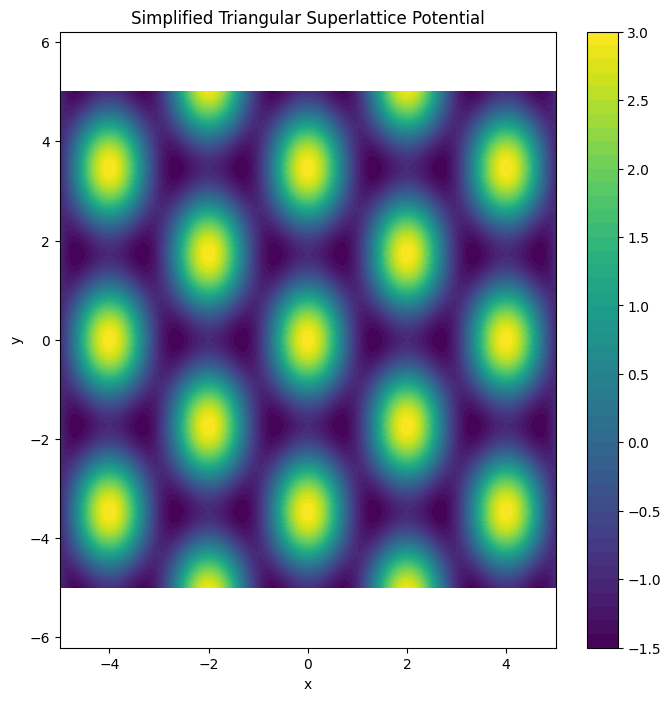

In [4]:
x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x, y)
def simplified_triangular_potential(X, Y, a):
    kx = 2 * np.pi / a
    ky = 2 * np.pi / (a * np.sqrt(3))

    return np.cos(kx * X) + np.cos(kx/2 * X + ky * Y) + np.cos(kx/2 * X - ky * Y)

a = 2.0
V = simplified_triangular_potential(X, Y, a)
plt.figure(figsize=(8, 8))
plt.contourf(X, Y, V, levels=50, cmap='viridis')
plt.colorbar()
plt.title('Simplified Triangular Superlattice Potential')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()


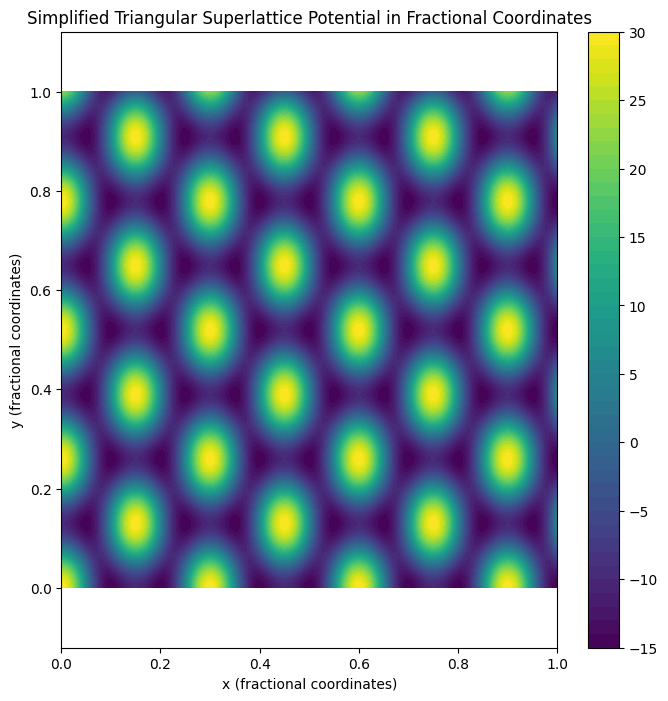

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def simplified_triangular_potential_frac(V_sl, X_frac, Y_frac):
    kx_frac = 2 * np.pi / 0.15
    ky_frac = 2 * np.pi / (0.15 * np.sqrt(3))
    return V_sl*(np.cos(kx_frac * X_frac) +
            np.cos(kx_frac/2 * X_frac + ky_frac * Y_frac) +
            np.cos(kx_frac/2 * X_frac - ky_frac * Y_frac))

x_frac = np.linspace(0, 1, 400)
y_frac = np.linspace(0, 1, 400)
X_frac, Y_frac = np.meshgrid(x_frac, y_frac)
V_sl = 10

V_frac = simplified_triangular_potential_frac(V_sl,X_frac, Y_frac)

plt.figure(figsize=(8, 8))
plt.contourf(X_frac, Y_frac, V_frac, levels=50, cmap='viridis')
plt.colorbar()
plt.title('Simplified Triangular Superlattice Potential in Fractional Coordinates')
plt.xlabel('x (fractional coordinates)')
plt.ylabel('y (fractional coordinates)')
plt.axis('equal')
plt.show()


In [17]:
file = 'graphene/non_standard_cell_pbc/length_10nm/2dbands/kronig/dense/potential_.1/TG_hr_with_atom_coord.dat'
structure = np.loadtxt(file, usecols=(3,4,5,6,7,14))
df = pd.DataFrame(structure)
df.columns = ['atom1', 'atom2', 'x_at1', 'y_at1', 'z_at1', 'hopping']
df_filtered = df[abs(df['hopping']) == 0.05]


In [18]:
df_filtered

,atom1,atom2,x_at1,y_at1,z_at1,hopping
49,1.0,1.0,3.550704,1.23,0.0,0.05
52,2.0,2.0,7.811549,1.23,0.0,0.05
55,3.0,3.0,12.072394,1.23,0.0,0.05
58,4.0,4.0,16.333240,1.23,0.0,0.05
61,5.0,5.0,20.594084,1.23,0.0,0.05
...,...,...,...,...,...,...
322,92.0,92.0,83.796619,0.00,0.0,-0.05
325,93.0,93.0,88.057466,0.00,0.0,-0.05
328,94.0,94.0,92.318314,0.00,0.0,-0.05
331,95.0,95.0,96.579155,0.00,0.0,-0.05


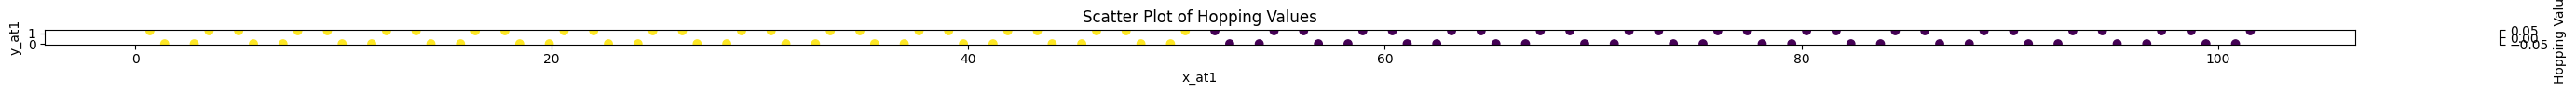

In [25]:
import matplotlib.pyplot as plt

# Assuming df_filtered is already defined and contains the desired data
x_values = df_filtered['x_at1']
y_values = df_filtered['y_at1']
colors = df_filtered['hopping']  # Color of points will depend on the hopping value

# Create a scatter plot
plt.figure(figsize=(40, 0.2))  # Optional: Specifies the figure size
scatter = plt.scatter(x_values, y_values, c=colors, cmap='viridis')
plt.colorbar(scatter, label='Hopping Value')  # Add a color bar to the plot which shows the color scale

plt.title('Scatter Plot of Hopping Values')
plt.xlabel('x_at1')
plt.ylabel('y_at1')
plt.show()
